In [8]:
import os
import numpy as np
import h5py
from scipy.io import netcdf
import pandas as pd
import conusfun as cfun

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [2]:
dfs = pd.read_csv( os.path.join(cfun.list_gauges_dir, 'HOURLY_LOC_NYEARS.csv'),
                index_col = 0)
plot_true = True

In [6]:
npixels = 5 # box size to compute stdv

bblat = np.logical_and(cfun.lats >= cfun.solat, cfun.lats <= cfun.nolat)
bblon = np.logical_and(cfun.lons >= cfun.welon, cfun.lons <= cfun.ealon)

boxlat = cfun.lats[bblat]
boxlon = cfun.lons[bblon]

boxx = np.arange(cfun.nlons)[bblon]
boxy = np.arange(cfun.nlats)[bblat]

nblon = np.size(boxlon)
nblat = np.size(boxlat)

/home/arturo/anaconda3/envs/AXE/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


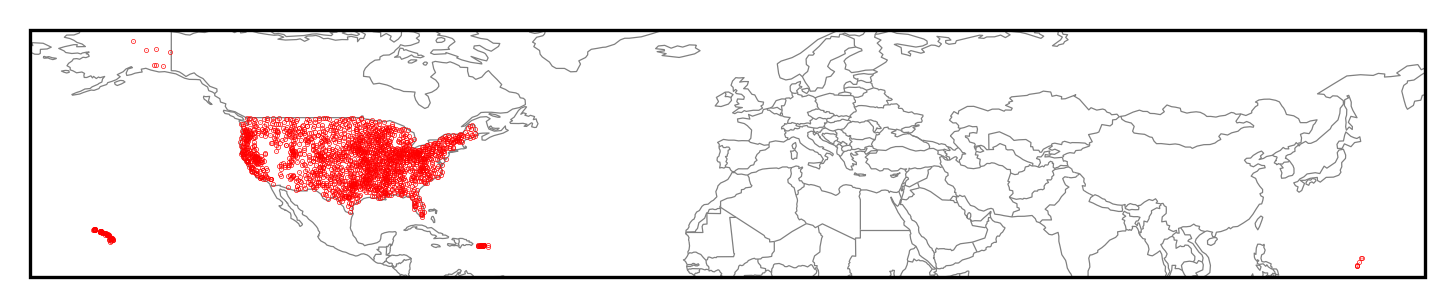

In [14]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,6),dpi=300)
gs = gridspec.GridSpec(1,1)

# =======================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.3,color='grey')
ax1.add_feature(cf.BORDERS,linewidth=0.3,color='grey')
sc = ax1.scatter(dfs['LON'].values,dfs['LAT'].values, marker='.', c='red', s=0.1,  zorder=10)